In [1]:
# insert API
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
from inspect import getmembers, isfunction
{n for n,_ in getmembers(pd, isfunction)} - set(dir(pd.DataFrame)) - set(dir(pd.Series))
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.5f' % x)

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  # print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
type(data)

dict

In [2]:
# make API df original dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10553,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19544625.00000,19544625.00000,False,NaN,1,NaN,NaN,None,2023-11-17T08:18:00.000Z,36239.29344,26188393140.86099,-7.76250,-0.16204,-3.11456,-0.37845,27.15950,35.62055,39.56289,708283400459.02588,50.97370,761025162142.51001,None,2023-11-17T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-17 16:19:57.573613
1,1027,Ethereum,ETH,ethereum,7792,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120253396.55323,120253396.55323,True,NaN,2,NaN,NaN,None,2023-11-17T08:18:00.000Z,1971.52194,14651683648.77940,16.62870,-0.40063,-3.81905,-5.51836,25.32315,20.72010,18.54475,237082209842.06131,17.10350,237082209842.06000,None,2023-11-17T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-17 16:19:57.573613
2,825,Tether USDt,USDT,tether,65902,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,87529899328.07368,90623279059.69533,True,NaN,3,NaN,NaN,None,2023-11-17T08:17:00.000Z,1.00024,52464097488.90054,1.99820,0.00423,-0.00984,-0.00384,-0.02783,0.00247,0.03823,87550523280.88870,6.30330,90644631880.22000,None,2023-11-17T08:17:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-11-17 16:19:57.573613
3,1839,BNB,BNB,bnb,1766,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,151700931.89271,151700931.89271,False,NaN,4,NaN,NaN,None,2023-11-17T08:17:00.000Z,244.67051,917918687.78061,-3.96670,-0.14644,-3.86438,-2.49331,15.04968,12.77126,13.28614,37116744728.20940,2.67770,37116744728.21000,None,2023-11-17T08:17:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-17 16:19:57.573613
4,52,XRP,XRP,xrp,1144,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,53718306475.00000,99988221902.00000,False,NaN,5,NaN,NaN,None,2023-11-17T08:18:00.000Z,0.61505,1692417862.81193,14.55010,-0.64287,-5.34500,-5.49787,25.91933,24.75397,21.61194,33039470447.39432,2.38350,61505048493.61000,None,2023-11-17T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-17 16:19:57.573613
5,5426,Solana,SOL,solana,546,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,422749339.90571,562637715.00740,True,NaN,6,NaN,NaN,None,2023-11-17T08:18:00.000Z,57.73871,3825028157.24309,-7.82980,-1.86119,-11.82886,22.90695,141.41349,201.71751,164.79420,24409003044.38962,1.76090,32485977864.73000,None,2023-11-17T08:18:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-11-17 16:19:57.573613
6,3408,USDC,USDC,usd-coin,14980,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,24095761145.34518,24095761145.34518,False,NaN,7,NaN,NaN,None,2023-11-17T08:18:00.000Z,1.00006,6616713318.08425,1.65300,0.01527,0.01502,-0.00150,-0.01701,-0.00994,0.00593,24097214557.96031,1.73840,24097214557.96000,None,2023-11-17T08:18:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-11-17 16:19:57.573613
7,2010,Cardano,ADA,cardano,974,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35278519634.94600,36365391092.90400,False,NaN,8,NaN,NaN,None,2023-11-17T08:17:00.000Z,0.36872,710870622.70048,41.70680,-0.92873,-7.98093,-0.69461,49.61329,48.36855,40.06597,13008059924.78134,0.93650,16592609402.90000,None,2023-11-17T08:17:00.

In [3]:
#  automation func

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
  
    # new df
    #df1 = pd.json_normalize(data['data'])
    #df1['Timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df1)
    #df = pd.concat([df,df_append])

    #  create a csv and append data to it
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df.to_csv(r'C:\Users\Administrator\Desktop\测\web-projects\play\jupyter\API.csv', header='column_names')
    df = pd.read_csv(r'C:\Users\Administrator\Desktop\测\web-projects\play\jupyter\API.csv')

In [4]:
import os 
from time import time
from time import sleep

for i in range(5):
    api_runner()
    print('API Runner completed successful')
    #sleep(30)
exit()

API Runner completed successful
API Runner completed successful
API Runner completed successful
API Runner completed successful
API Runner completed successful


In [5]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.16204
             quote.USD.percent_change_24h    -3.11456
             quote.USD.percent_change_7d     -0.37845
             quote.USD.percent_change_30d    27.15950
             quote.USD.percent_change_60d    35.62055
             quote.USD.percent_change_90d    39.56289
Ethereum     quote.USD.percent_change_1h     -0.40063
             quote.USD.percent_change_24h    -3.81905
             quote.USD.percent_change_7d     -5.51836
             quote.USD.percent_change_30d    25.32315
             quote.USD.percent_change_60d    20.72010
             quote.USD.percent_change_90d    18.54475
Tether USDt  quote.USD.percent_change_1h      0.00423
             quote.USD.percent_change_24h    -0.00984
             quote.USD.percent_change_7d     -0.00384
             quote.USD.percent_change_30d    -0.02783
             quote.USD.percent_change_60d     0.00247
             quote.USD.percent_change_90

In [6]:
df4 = df3.stack()
type(df4)

pandas.core.series.Series

In [7]:
df5 = df4.to_frame(name='values')
df5.count()

values    90
dtype: int64

In [8]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16204
1,Bitcoin,quote.USD.percent_change_24h,-3.11456
2,Bitcoin,quote.USD.percent_change_7d,-0.37845
3,Bitcoin,quote.USD.percent_change_30d,27.15950
4,Bitcoin,quote.USD.percent_change_60d,35.62055
5,Bitcoin,quote.USD.percent_change_90d,39.56289
6,Ethereum,quote.USD.percent_change_1h,-0.40063
7,Ethereum,quote.USD.percent_change_24h,-3.81905
8,Ethereum,quote.USD.percent_change_7d,-5.51836
9,Ethereum,quote.USD.percent_change_30d,25.32315


In [9]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.16204
1,Bitcoin,quote.USD.percent_change_24h,-3.11456
2,Bitcoin,quote.USD.percent_change_7d,-0.37845
3,Bitcoin,quote.USD.percent_change_30d,27.15950
4,Bitcoin,quote.USD.percent_change_60d,35.62055
5,Bitcoin,quote.USD.percent_change_90d,39.56289
6,Ethereum,quote.USD.percent_change_1h,-0.40063
7,Ethereum,quote.USD.percent_change_24h,-3.81905
8,Ethereum,quote.USD.percent_change_7d,-5.51836
9,Ethereum,quote.USD.percent_change_30d,25.32315


In [10]:
sns.catplot(x='level_1', y='values', hue='name', data=df6, kind='point')


In [11]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'], inplace = True)
df7

,name,percent_change,values
0,Bitcoin,None,-0.16204
1,Bitcoin,None,-3.11456
2,Bitcoin,None,-0.37845
3,Bitcoin,None,27.15950
4,Bitcoin,None,35.62055
5,Bitcoin,None,39.56289
6,Ethereum,None,-0.40063
7,Ethereum,None,-3.81905
8,Ethereum,None,-5.51836
9,Ethereum,None,25.32315


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

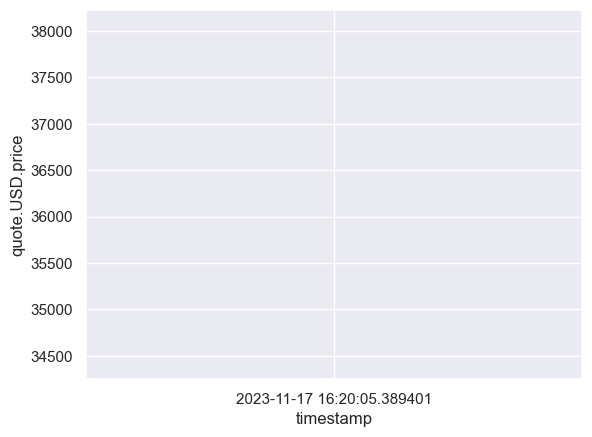

In [12]:
#create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df10)